In [410]:
import numpy as np
import scipy as sp
import networkx as nx

import random
from IPython.display import Image

%matplotlib inline

In [655]:
def near(a, b, rtol = 1e-5, atol = 1e-8):
    return np.abs(a-b)<(atol+rtol*np.abs(b))

# percent a 2-1 is worth relative to a 2-0
pct_sweep = 0.5 #2 / 3
pct_win = (pct_sweep + 1) / 4
pct_lose = (1 - pct_sweep) / 2
print(pct_win, pct_lose)
print(pct_win * 2 - pct_lose)

def rank(teams, teamcolors, games):
    
    games_per_team = len(games) * 2 / len(teams)
    wl = { team: [0, 0] for team in teams }
    
    G = nx.MultiDiGraph()
    G.add_nodes_from(teams)
    for game in games:
        if 2 == len(game):
            G.add_edge(game[0], game[1], weight=1)
            wl[game[0]][0] += 1
            wl[game[1]][1] += 1
        if 4 == len(game):
            w, l = (game[0], game[1]) if game[2] > game[3] else (game[1], game[0])
            wl[w][0] += 1
            wl[l][1] += 1
            if game[2] + game[3] == 3:
                G.add_edge(w, l, weight=pct_win)
                G.add_edge(w, l, weight=pct_win)
                G.add_edge(l, w, weight=pct_lose)
            else:
                G.add_edge(w, l, weight=0.5)
                G.add_edge(w, l, weight=0.5)
        
    #G_forw = G.copy()
    G_back = G.copy()
    G_back = G_back.reverse()
    
    for team in teams:
        self_weight = games_per_team - sum(map(lambda e: e[2]['weight'], G_back.out_edges(team, data=True)))
        #self_weight = games_per_team - wl[team][1]
        print(team, self_weight)
        if self_weight > 0:
            G_back.add_edge(team, team, weight=self_weight)

    
    pr = nx.pagerank_numpy(G_back, alpha=0.75)

    sorts = list(sorted(pr.keys(), key=lambda k: pr[k], reverse=True))
    
    print('      PR TEAM  PR-SCORE    S W/L   %   G W/L   %')
    for i in range(len(sorts)):
        team = sorts[i]
        wins = len(G.out_edges(team))
        losses = len(G.in_edges(team))
        print('    {:3d}) {:5s} {:.5f}       {:d}/{:d} {:3.0f}     {:d}/{:d} {:3.0f}'.format(
            i + 1, team, pr[team], wl[team][0], wl[team][1], 100 * wl[team][0] / sum(wl[team]),
            wins, losses, 100 * wins / (wins + losses)))

    P = nx.drawing.nx_pydot.to_pydot(G)

    for team in teams:
        color = teamcolors[team]
        node = P.get_node(team)[0]
        node.set_color(color)
        node.set_fontcolor(color)
        node.set_label('#{} {}\n{:.5f}'.format(sorts.index(team) + 1, team, pr[team]))
    for edge in P.get_edges():
        color = teamcolors[edge.get_source()]
        edge.set_color(color)

    width = 768
        
    P.set_layout('circo')
    im = Image(P.create_png(prog='neato'), width=width)
    display(im)
    
    P2 = nx.drawing.nx_pydot.to_pydot(G_back)
    P2.set_layout('circo')
    for team in teams:
        color = teamcolors[team]
        node = P2.get_node(team)[0]
        node.set_color(color)
        node.set_fontcolor(color)
        node.set_label('#{} {}\n{:.5f}'.format(sorts.index(team) + 1, team, pr[team]))
    for edge in P2.get_edges():
        color = teamcolors[edge.get_destination()]
        edge.set_color(color)
        edge.set_fontcolor(color)
        edge.set_label('{:.3f}'.format(float(edge.get_weight())))
    im2 = Image(P2.create_png(prog='neato'), width=width)
    
    display(im2)

0.375 0.25
0.5


KZ 3.0
KDM 2.5
KSV 2.75
MVP 0.0
AFS 2.0
KT 2.75
SKT 1.25
ROX 1.75
BBQ 2.25
JAG 1.75
      PR TEAM  PR-SCORE    S W/L   %   G W/L   %
      1) KSV   0.15856       3/1  75     6/3  67
      2) KZ    0.13946       3/1  75     6/2  75
      3) KDM   0.12968       2/2  50     6/4  60
      4) KT    0.12122       3/1  75     7/4  64
      5) BBQ   0.11048       2/2  50     6/5  55
      6) AFS   0.10667       2/2  50     5/5  50
      7) ROX   0.09169       2/2  50     5/6  45
      8) SKT   0.06040       1/3  25     4/7  36
      9) JAG   0.05683       2/2  50     4/5  44
     10) MVP   0.02500       0/4   0     0/8   0


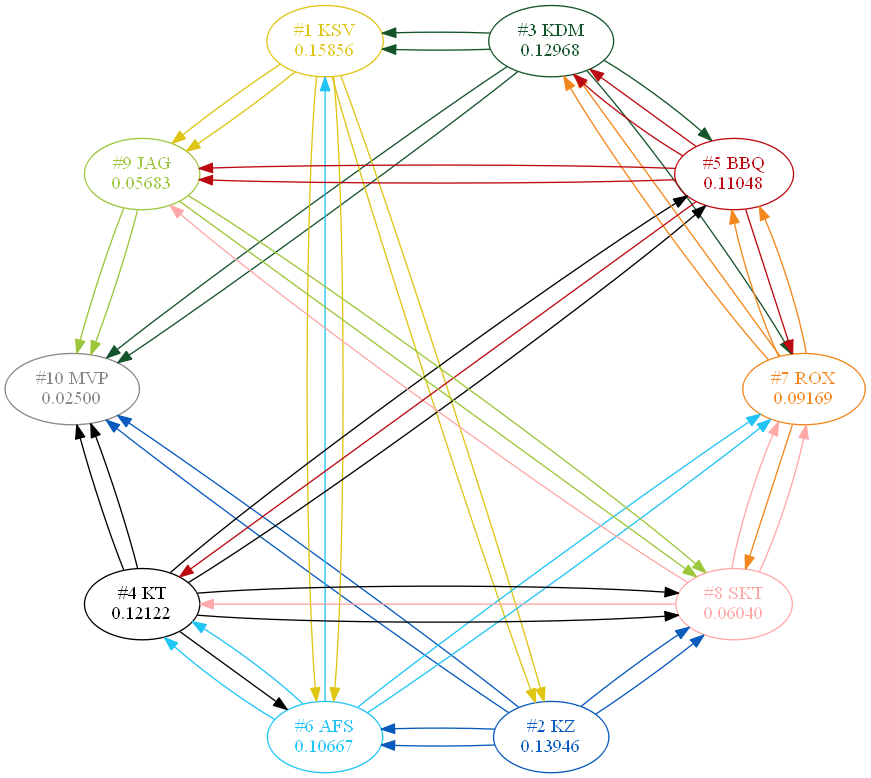

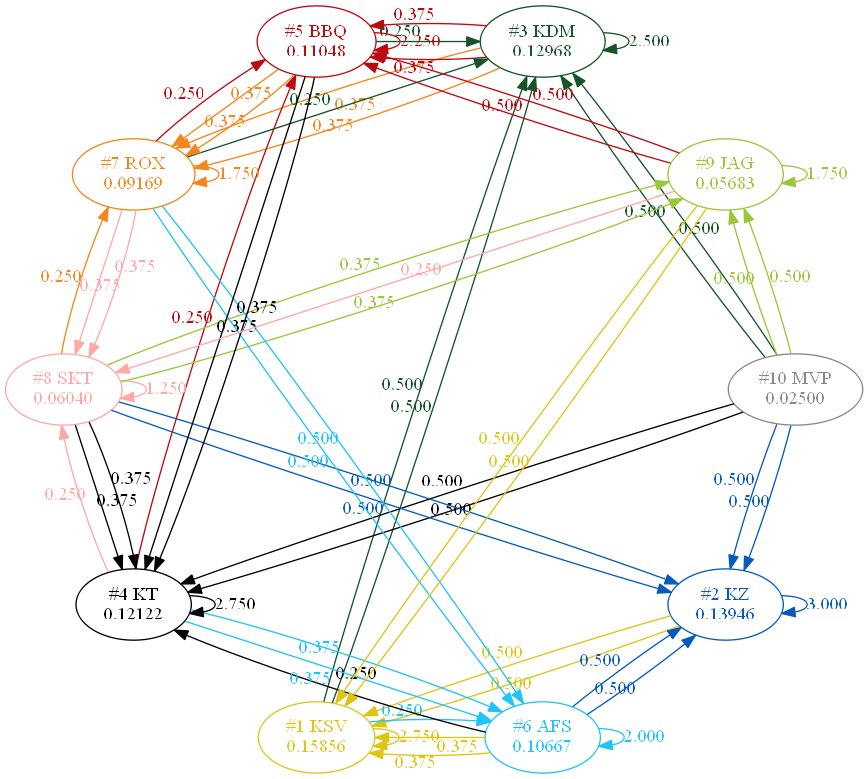

In [659]:
lck = {
    'teams': [
        'KZ',
        'KDM',
        'KSV',
        'MVP',
        'AFS',
        'KT',
        'SKT',
        'ROX',
        'BBQ',
        'JAG',
    ],
    'teamcolors': {
        'KDM': '#14542a',
        'JAG': '#9cc63b',
        'KZ': '#085abc',
        'SKT': '#ffa8a8',
        'AFS': '#20c4f5',
        'KSV': '#dec514',
        'ROX': '#f3861c',
        'BBQ': '#bb0a12',
        'MVP': '#888888',
        'KT': '#000000',
    },
    'games': [
        # (a, b, a wins, b wins)
        # w,l are wins, losses for series
        # w1d1
        ('KZ',  'KSV', 0, 2),
        ('KDM', 'MVP', 2, 0),
        # w1d2
        ('AFS', 'KT',  2, 1),
        ('SKT', 'ROX', 2, 1),
        # w1d3
        ('KDM', 'BBQ', 1, 2),
        ('JAG', 'KSV', 0, 2),
        # w1d4
        ('KT',  'MVP', 2, 0),
        ('JAG', 'SKT', 2, 1),
        
        # w2d1
        ('AFS', 'KZ',  0, 2),
        ('BBQ', 'ROX', 1, 2),
        # w2d2
        ('JAG', 'MVP', 2, 0),
        ('KT',  'SKT', 2, 1),
        # w2d3
        ('ROX', 'KDM', 2, 1),
        ('KSV', 'AFS', 2, 1),
        # w2d4
        ('KZ', 'SKT', 2, 0),
        ('KT', 'BBQ',  2, 1),
        # w2d5
        ('KSV', 'KDM', 0, 2),
        ('ROX', 'AFS',  0, 2),
        # w2d6
        ('BBQ', 'JAG', 2, 0),
        ('MVP', 'KZ',  0, 2),
    ]
}
rank(**lck)

TL 3.0
100 3.0
CG 2.0
FOX 4.0
C9 3.0
TSM 1.0
OPT 1.0
GGS 0.0
FLY 2.0
CLG 1.0
      PR TEAM  PR-SCORE    S W/L   %   G W/L   %
      1) FOX   0.32806       4/0 100     4/0 100
      2) C9    0.14474       3/1  75     3/1  75
      3) 100   0.14286       3/1  75     3/1  75
      4) TL    0.11890       3/1  75     3/1  75
      5) FLY   0.05982       2/2  50     2/2  50
      6) CG    0.05846       2/2  50     2/2  50
      7) OPT   0.04457       1/3  25     1/3  25
      8) TSM   0.04106       1/3  25     1/3  25
      9) CLG   0.03654       1/3  25     1/3  25
     10) GGS   0.02500       0/4   0     0/4   0


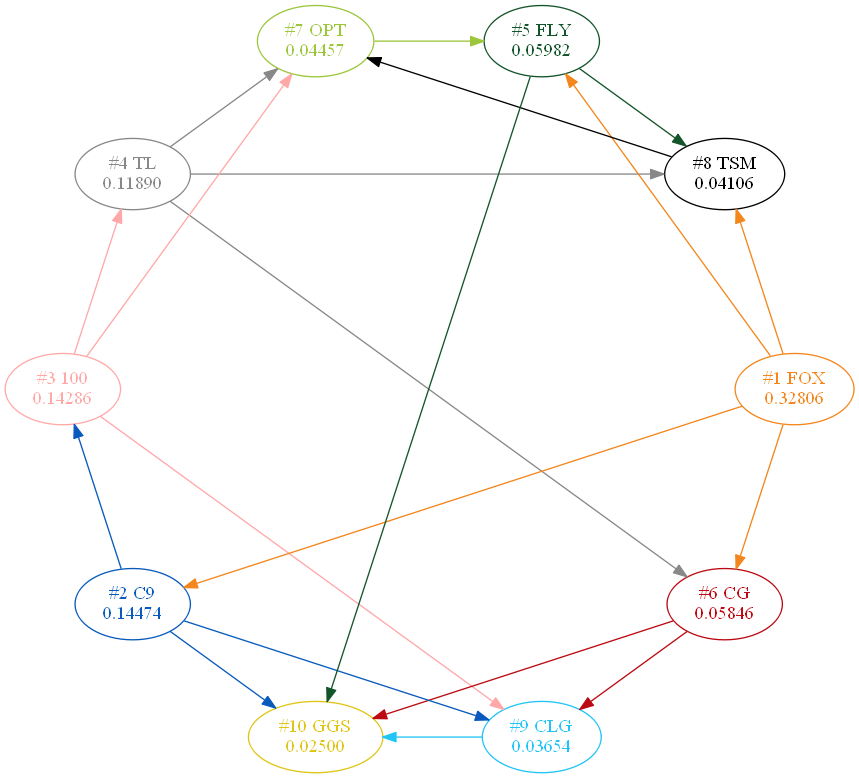

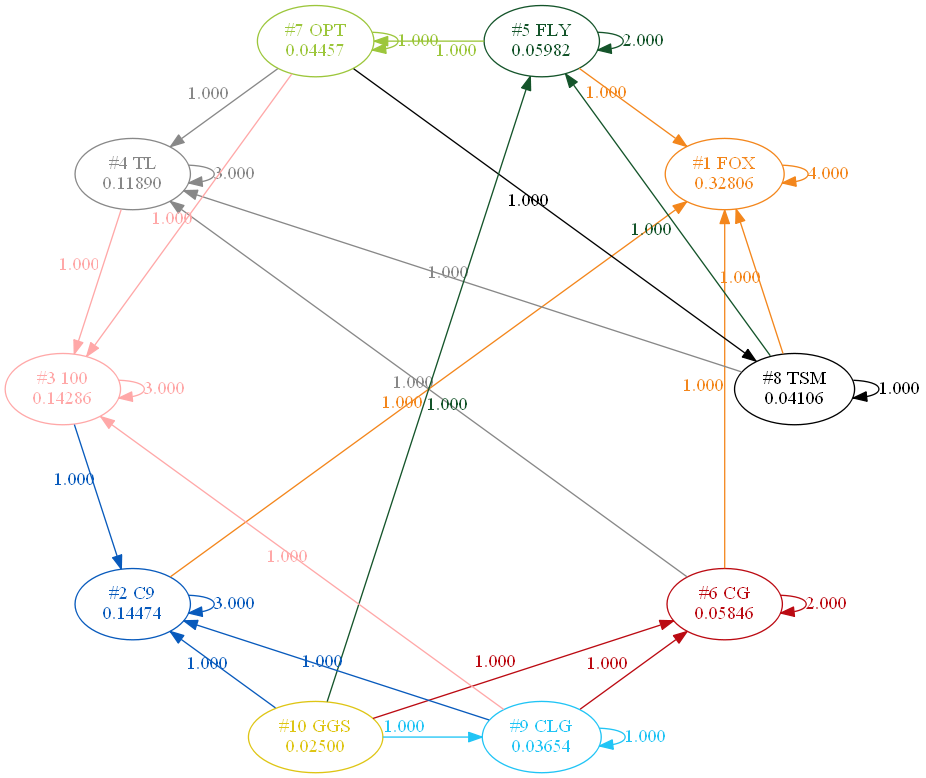

In [656]:
nalcs = {
    'teams': [
        'TL',
        '100',
        'CG',
        'FOX',
        'C9',
        'TSM',
        'OPT',
        'GGS',
        'FLY',
        'CLG',
    ],
    'teamcolors': {
        'TL': '#888888',
        '100': '#ffa8a8',
        'CG': '#bb0a12',
        'FOX': '#f3861c',
        'C9': '#085abc',
        'TSM': '#000000',
        'OPT': '#9cc63b',
        'GGS': '#dec514',
        'FLY': '#14542a',
        'CLG': '#20c4f5',
    },
    'games': [
        # (winner, loser)
        # w1d1
        ('TL', 'TSM'),
        ('100', 'OPT'),
        ('CG', 'GGS'),
        ('FOX', 'FLY'),
        ('C9', 'CLG'),
        # w1d2
        ('TL', 'OPT'),
        ('FLY', 'TSM'),
        ('100', 'CLG'),
        ('C9', 'GGS'),
        ('FOX', 'CG'),
        # w2d1
        ('CG', 'CLG'),
        ('TSM', 'OPT'),
        ('FOX', 'C9'),
        ('100', 'TL'),
        ('FLY', 'GGS'),
        # w2d2
        ('FOX', 'TSM'),
        ('C9', '100'),
        ('OPT', 'FLY'),
        ('CLG', 'GGS'),
        ('TL', 'CG'),
    ]
}
rank(**nalcs)

G2 1.0
H2K 1.0
UOL 0.0
ROC 3.0
FNC 2.0
MSF 3.0
VIT 3.0
GIA 3.0
S04 2.0
SPY 2.0
      PR TEAM  PR-SCORE    S W/L   %   G W/L   %
      1) MSF   0.18731       3/1  75     3/1  75
      2) VIT   0.16667       3/1  75     3/1  75
      3) ROC   0.13109       3/1  75     3/1  75
      4) GIA   0.12109       3/1  75     3/1  75
      5) S04   0.08683       2/2  50     2/2  50
      6) FNC   0.08426       2/2  50     2/2  50
      7) G2    0.07399       1/3  25     1/3  25
      8) SPY   0.07355       2/2  50     2/2  50
      9) H2K   0.05021       1/3  25     1/3  25
     10) UOL   0.02500       0/4   0     0/4   0


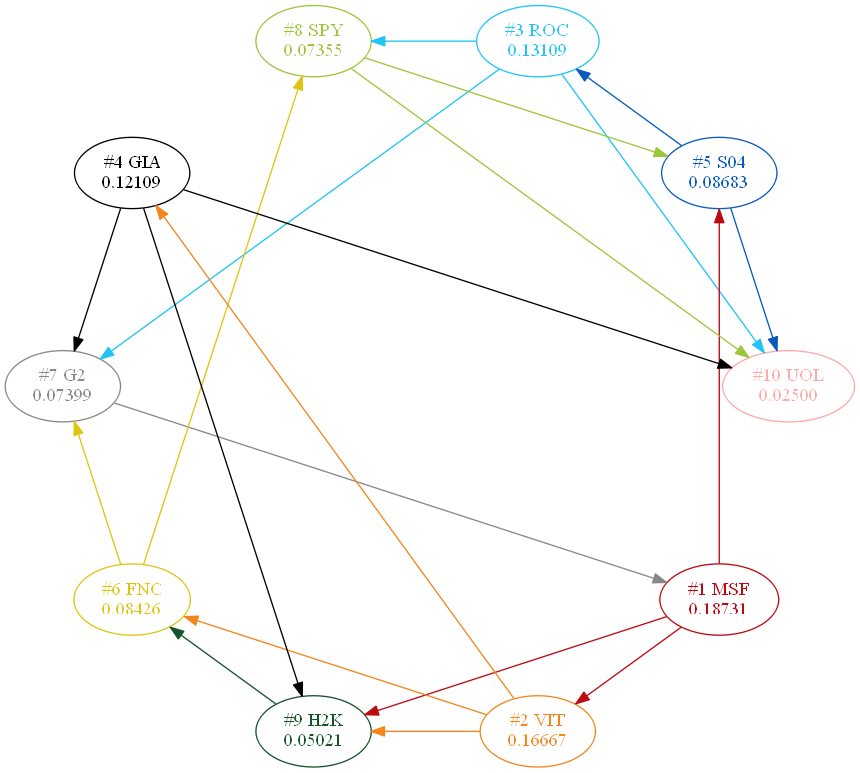

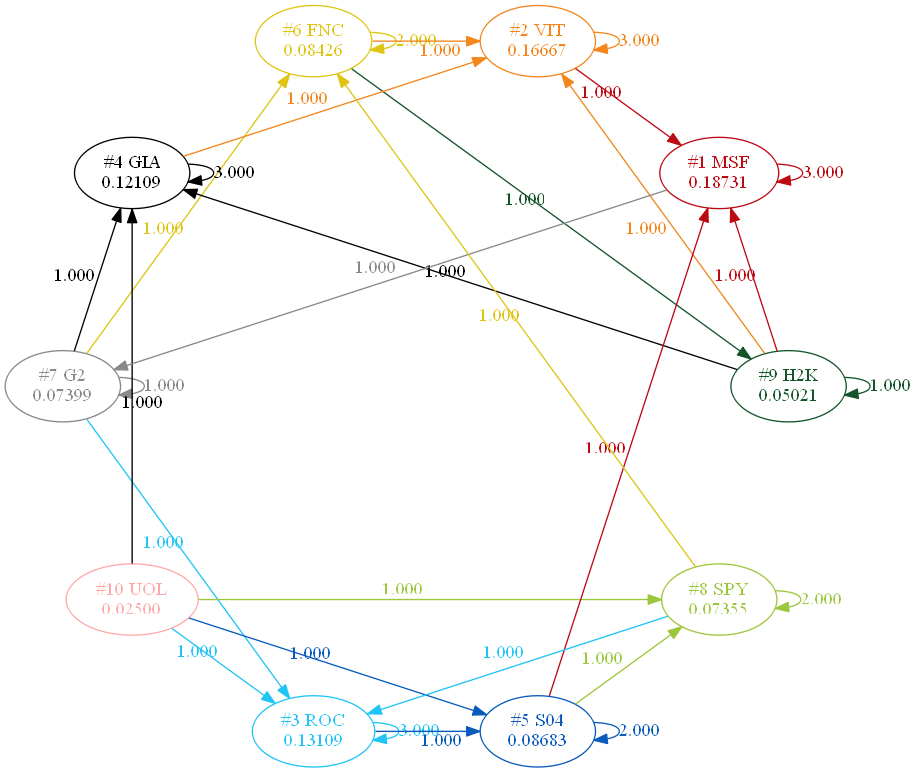

In [657]:
eulcs = {
    'teams': [
        'G2',
        'H2K',
        'UOL',
        'ROC',
        'FNC',
        'MSF',
        'VIT',
        'GIA',
        'S04',
        'SPY',
    ],
    'teamcolors': {
        'G2': '#888888',
        'UOL': '#ffa8a8',
        'VIT': '#f3861c',
        'MSF': '#bb0a12',
        'S04': '#085abc',
        'ROC': '#20c4f5',
        'GIA': '#000000',
        'SPY': '#9cc63b',
        'FNC': '#dec514',
        'H2K': '#14542a',
    },
    'games': [
        # (winner, loser)
        # w1d1
        ('G2', 'MSF'),
        ('VIT', 'H2K'),
        ('GIA', 'UOL'),
        ('S04', 'ROC'),
        ('FNC', 'SPY'),
        # w1d2
        ('VIT', 'GIA'),
        ('SPY', 'UOL'),
        ('H2K', 'FNC'),
        ('ROC', 'G2'),
        ('MSF', 'S04'),
        # w2d1
        ('GIA', 'G2'),
        ('ROC', 'SPY'),
        ('MSF', 'H2K'),
        ('VIT', 'FNC'),
        ('S04', 'UOL'),
        # w2d2
        ('GIA', 'H2K'),
        ('ROC', 'UOL'),
        ('MSF', 'VIT'),
        ('SPY', 'S04'),
        ('FNC', 'G2'),
    ]
}
rank(**eulcs)

      PR TEAM  PR-SCORE    S W/L %     G W/L %
      1) KSV   0.22842       3/0 100     6/1  86
      2) BBQ   0.12604       2/1  67     5/3  62
      3) ROX   0.12470       2/1  67     5/4  56
      4) KT    0.10291       2/1  67     5/3  62
      5) KZ    0.09983       2/1  67     4/2  67
      6) SKT   0.07992       1/2  33     4/5  44
      7) AFS   0.07964       1/2  33     3/5  38
      8) KDM   0.07500       1/2  33     4/4  50
      9) JAG   0.05854       2/2  50     4/5  44
     10) MVP   0.02500       0/4   0     0/8   0